# Starting a new VAMML experiment batch
- Date: 2025-09-14
### Overview
This notebook is made to guide the user through the basics of setting up a new VAMML experiment, generating a set of random shapes and then creating a voxel array from them.

In [ ]:
from vamml.batches.experiment import Experiment
import numpy as np
from matplotlib import pyplot as plt
import os

First we specify a source directory to locate our new experiment. expt_tag is set to True, which will make the experiment infer the expt_name from the next highest directory level.

In [2]:
# Specifying a new test experiment name.
src = './examples/test'

expt = Experiment(src, 
                  expt_tag = True,  
                 )

A new experiment will have default parameters set. Let's generate a new set of shapes for this experiment, and then plot them to verify everything is ok.

Batch generated |████████████████████████████████████████| 1/1 [100%] in 2.7s (0.37/s) 


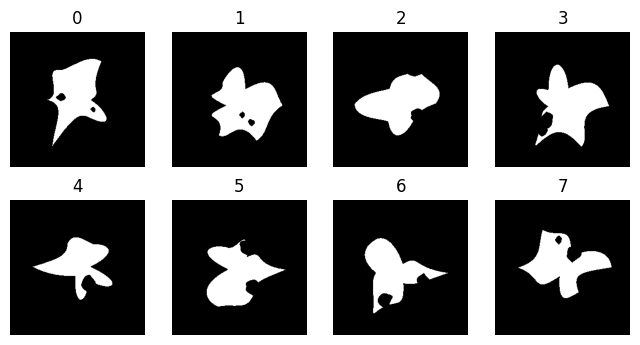

In [3]:
expt.new_seed()
expt.generate_shapes()

expt.plot_shapes()

Let's export the shapes to a voxel stack which can be loaded into a volumetric printer. Then let's plot a sum intensity projection on all axes just to verify output.

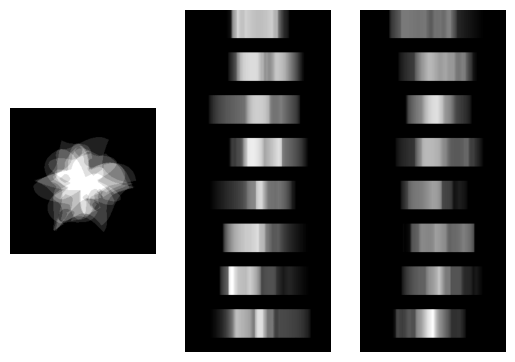

In [4]:
expt.shapes_to_voxels()

arr = np.fromfile(os.path.join(src,'test voxels.dat'),dtype=np.uint8)

arr = arr.reshape((len(arr)//256**2,256,256))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(arr.sum(i),cmap='gray')
    plt.axis('off')

Let's wrap up initial experiment preparation by saving parameters in case we need them later.

In [5]:
expt.save_pars()